<a href="https://colab.research.google.com/github/FelipeMielkeVieira/Almoxarifado/blob/main/LeituraTexto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd

comentarios = pd.read_csv("comentarios.csv")

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vetorizador = CountVectorizer()
bow = vetorizador.fit_transform(comentarios.text)
palavras_tratados = vetorizador.get_feature_names_out()

In [24]:
matriz = pd.DataFrame.sparse.from_spmatrix(bow, columns=palavras_tratados)
matriz

,00,00h06,017,05,05am,08,09,10,100,10min,...,ônibus,última,último,últimos,única,único,útil,ʺnadessa,ʺrodrigo,ʺzeca
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split

teste, treino, teste_sentimento, treino_sentimento = train_test_split(bow, comentarios.label)

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(treino, treino_sentimento)
acuracia = lr.score(teste, teste_sentimento)

acuracia

0.5162708883025505

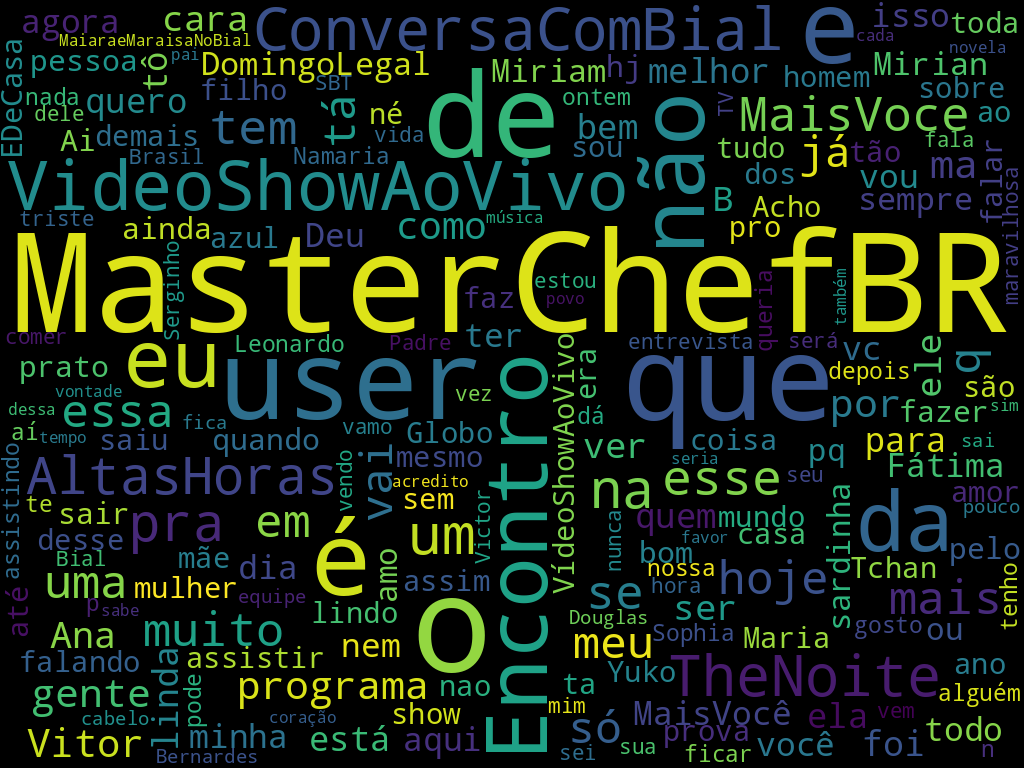

In [36]:
from wordcloud import WordCloud

texto = " ".join([ comentario for comentario in comentarios.text ])

nuvem_palavras = WordCloud(width=1024,height=768,collocations=False).generate(texto)

nuvem_palavras.to_image()